In [ ]:
"""Challenge_test_5var

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ihpwHVNIDOmx5EeGpPQ0XWPpXyYSB0wa
"""

# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

# Read dataset
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/unseen_data_imputed.csv'
dataset = pd.read_csv(dataset_url)
print(dataset)

# Select variables to be included in the model
dataset['masq']=np.log(dataset['URXUMASI'])
dataset['agesq']=dataset['RIDAGEMN']**2
dataset['lnlb']=np.log(dataset['LBXIN'])
dataset['tv'] = np.where(dataset['PAQ480'] <4, 0, 1)
features = ['RIDAGEMN','agesq', 'masq','lnlb', 'tv', 'TELOMEAN']
targets = ['mortstat']

dataset.describe()

X = dataset[features].values
y = dataset[targets].values

# Rescale variables
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X)

X_normalized = scaler.transform(X)

# Set model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression(random_state=0)

# Fit model
clf.fit(X_normalized, y)

# Predict
pred = clf.predict(X_normalized)

acc = accuracy_score(y, pred)
print(f'Model Accuracy: {acc}')

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC


In [3]:
# Read dataset
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/train_data_imputed.csv'
dataset = pd.read_csv(dataset_url)

$ y= x^2 + x $

In [5]:
# Select variables to be included in the model

dataset['agesq']=dataset['RIDAGEMN']**2 #age squared
dataset['masq']=np.log(dataset['URXUMASI']) #albumin
dataset['lnlb']=np.log(dataset['LBXIN']) #insulin
dataset['tv'] = np.where(dataset['PAQ480'] <4, 0, 1) #binary tv time 
features = ['RIDAGEMN','agesq', 'masq','lnlb', 'tv', 'TELOMEAN']
targets = ['mortstat']

In [6]:
X = dataset[features].values
y = dataset[targets].values

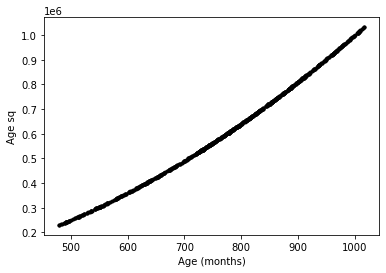

In [7]:
#Plots
plt.scatter(X[:, 0], X[:, 1], marker='.', color='black')
plt.xlabel('Age (months)')
plt.ylabel('Age sq')
plt.show()


In [8]:
# Generate training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)


In [9]:
# Rescale variables
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)

In [11]:
# Set model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression(C=1.0, penalty='l2',random_state=0)

# Fit model
clf.fit(X_train_normalized, y_train)

/Users/carmen/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [12]:
# Predict and test in validation dataset
pred = clf.predict(X_val_normalized)

acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.7358490566037735


In [17]:
# Read unseen
unseen_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/unseen_data_imputed.csv'
unseen = pd.read_csv(unseen_url)


# Select variables to be included in the model
unseen['masq']=np.log(unseen['URXUMASI'])
unseen['agesq']=unseen['RIDAGEMN']**2
unseen['lnlb']=np.log(unseen['LBXIN'])
unseen['tv'] = np.where(unseen['PAQ480'] <4, 0, 1)
features = ['RIDAGEMN','agesq', 'masq','lnlb', 'tv', 'TELOMEAN']
targets = ['mortstat']


X = unseen[features].values
y = unseen[targets].values

# Rescale variables
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X)

X_normalized = scaler.transform(X)

# Set model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression(C=1.0, penalty='l2',random_state=0)

# Fit model
clf.fit(X_normalized, y)

# Predict
pred = clf.predict(X_normalized)

acc = accuracy_score(y, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.7386363636363636


/Users/carmen/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
